# Get Started with Huggingface.
'Reference to the Huggingface Transformers Docs'


## Check GPU Availaibility

In [ ]:
import tensorflow as tf
print(tf.test.is_gpu_available())
print(tf.config.list_physical_devices('GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!nvidia-smi

Tue Jun  1 00:55:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    29W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Install Dependencies

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.3MB 8.3MB/s 
     |████████████████████████████████| 901kB 34.3MB/s 
     |████████████████████████████████| 3.3MB 47.7MB/s 


In [ ]:
!pip install datasets

     |████████████████████████████████| 235kB 7.3MB/s 
     |████████████████████████████████| 245kB 11.4MB/s 
     |████████████████████████████████| 112kB 14.6MB/s 


## PipleLine 

```
The pipeling is the easiest way to leverage the transformers preptrained models for any specific task as below:

*   Sentiment analysis: is a text positive or negative?
*   Text generation (in English): provide a prompt and the model will generate what follows.
*   Name entity recognition (NER): in an input sentence, label each word with the entity it represents (person, place, etc.)
*   Question answering: provide the model with some context and a question, extract the answer from the context.
*   Filling masked text: given a text with masked words (e.g., replaced by [MASK]), fill the blanks.
*   Summarization: generate a summary of a long text.
*   Translation: translate a text in another language.
*   Feature extraction: return a tensor representation of the text.


---




In [ ]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

In [ ]:
classifier(['We are very happy to show you the 🤗 Transformers library.'])

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

In [ ]:
results = classifier(["We are very happy to show you the 🤗 Transformers library.","We hope you don't hate it."])
results

[{'label': 'POSITIVE', 'score': 0.9997795224189758},
 {'label': 'NEGATIVE', 'score': 0.5308594107627869}]

## Checking out the Tokenizer and Model Configs

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
model_name = "distilbert-base-uncased"
model = TFAutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'activation_13', 'vocab_projector', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_19', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

In [ ]:
model.config

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.6.1",
  "vocab_size": 30522
}

In [ ]:
tokenizer.get_vocab()

In [ ]:
inputs = tokenizer("We are very happy to show you the 🤗 Transformers library.")
inputs

{'input_ids': [101, 2057, 2024, 2200, 3407, 2000, 2265, 2017, 1996, 100, 19081, 3075, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tf_batch = tokenizer( 
    ["We are very happy to show you the 🤗 Transformers library.", "We hope you don't hate it."],
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors="tf"
)
tf_batch

{'input_ids': <tf.Tensor: shape=(2, 14), dtype=int32, numpy=
array([[  101,  2057,  2024,  2200,  3407,  2000,  2265,  2017,  1996,
          100, 19081,  3075,  1012,   102],
       [  101,  2057,  3246,  2017,  2123,  1005,  1056,  5223,  2009,
         1012,   102,     0,     0,     0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(2, 14), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]], dtype=int32)>}

In [ ]:
for key, value in tf_batch.items():
    print(f"{key}: {value.numpy().tolist()}")

input_ids: [[101, 2057, 2024, 2200, 3407, 2000, 2265, 2017, 1996, 100, 19081, 3075, 1012, 102], [101, 2057, 3246, 2017, 2123, 1005, 1056, 5223, 2009, 1012, 102, 0, 0, 0]]
attention_mask: [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]]


## Using the Model and get Predictions

In [ ]:
tf_outputs = model(tf_batch)
tf_outputs

TFSequenceClassifierOutput([('logits',
                             <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
                             array([[-0.07165767,  0.11297674],
                                    [-0.0838142 ,  0.10112902]], dtype=float32)>)])

In [ ]:
import tensorflow as tf
tf_outputs = model(tf_batch, labels = tf.constant([1, 0]))
print(tf_outputs)

TFSequenceClassifierOutput(loss=<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.6050852 , 0.78988826], dtype=float32)>, logits=<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.07165767,  0.11297674],
       [-0.0838142 ,  0.10112902]], dtype=float32)>, hidden_states=None, attentions=None)


In [ ]:
import tensorflow as tf
tf_predictions = tf.nn.sigmoid(tf_outputs.logits)

In [ ]:
print(tf_predictions)

tf.Tensor(
[[0.48209327 0.52821416]
 [0.47905868 0.52526075]], shape=(2, 2), dtype=float32)


In [ ]:
import tensorflow as tf
tf_predictions = tf.nn.softmax(tf_outputs.logits, axis = -1)
tf_predictions

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.45397207, 0.5460279 ],
       [0.45389554, 0.5461045 ]], dtype=float32)>

In [ ]:
#"We are very happy to show you the 🤗 Transformers library.", "We hope you don't hate it."

tf.argmax(tf_predictions[0])

<tf.Tensor: shape=(), dtype=int64, numpy=1>

## Saving the model and Tokenizer

Tokenizer saves the below files:

('./model_1/tokenizer_config.json',
 './model_1/special_tokens_map.json',
 './model_1/vocab.txt',
 './model_1/added_tokens.json',
 './model_1/tokenizer.json')

Model saves the below files:

*   config.json
*   tf_model.h5

---



In [ ]:
save_directory = "./model_1"
tokenizer.save_pretrained(save_directory)
model.save_pretrained(save_directory)

## Load the model from saved directory



In [ ]:
from transformers import AutoModel
tokenizer = AutoTokenizer.from_pretrained(save_directory)
model = AutoModel.from_pretrained(save_directory, from_tf=True)
model.config

All TF 2.0 model weights were used when initializing DistilBertModel.

All the weights of DistilBertModel were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use DistilBertModel for predictions without further training.


DistilBertConfig {
  "_name_or_path": "./model_1",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.6.1",
  "vocab_size": 30522
}

In [ ]:
# tf_outputs = model(tf_batch, output_hidden_states=True, output_attentions=True)
# all_hidden_states =  tf_outputs.hidden_states
# all_attentions = tf_outputs.attentions

AttributeError: ignored

## Customizing the model

Below, we load a predefined vocabulary for a tokenizer with the from_pretrained() method. However, unlike the tokenizer, we wish to initialize the model from scratch. Therefore, we instantiate the model from a configuration instead of using the from_pretrained() method.

In [ ]:
from transformers import DistilBertConfig, DistilBertTokenizer, TFDistilBertForSequenceClassification
config = DistilBertConfig(n_heads=8, dim=512, hidden_dim=4*512)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertForSequenceClassification(config)

For something that only changes the head of the model (for instance, the number of labels), you can still use a pretrained model for the body. For instance, let’s define a classifier for 10 different labels using a pretrained body. Instead of creating a new configuration with all the default values just to change the number of labels, we can instead pass any argument a configuration would take to the from_pretrained() method and it will update the default configuration appropriately:

In [ ]:
from transformers import DistilBertConfig, DistilBertTokenizer, TFDistilBertForSequenceClassification
model_name = "distilbert-base-uncased"
model = TFDistilBertForSequenceClassification.from_pretrained(model_name, num_labels=10)
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

# Preprocessing

### when we have non tokenized inputs

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
example = "We are learning Huggingface!"
encoded = tokenizer([example])
encoded

In [ ]:
decoded = tokenizer.decode(encoded['input_ids'][0])
decoded

In [ ]:
# When we dont want to add special tokens

encoded = tokenizer([example], add_special_tokens=False)
print(encoded)
decoded = tokenizer.decode(encoded['input_ids'][0])
print(f"Original Sentence without special tokens was  : {decoded}")

In [ ]:
batch_sentences = ["Hello I'm a single sentence",
                   "And another sentence",
                   "And the very very last one"]
encoded_inputs = tokenizer(batch_sentences)
encoded_inputs

In [ ]:
batch = tokenizer(batch_sentences, padding = True, truncation=  True, return_tensors="tf")
batch

In [ ]:
batch_sentences = ["Hello I'm a single sentence",
                   "And another sentence",
                   "And the very very last one"]
batch_of_second_sentences = ["I'm a sentence that goes with the first sentence",
                             "And I should be encoded with the second sentence",
                             "And I go with the very last one"]
encoded_inputs = tokenizer(batch_sentences, batch_of_second_sentences)
encoded_inputs

In [ ]:
for ids in encoded_inputs["input_ids"]:
    print(tokenizer.decode(ids))

### when we have pretokenized inputs for example used in NER

In [ ]:
encoded_input = tokenizer(["Hello", "I'm", "a", "single", "sentence"], is_split_into_words=True)
print(encoded_input)

In [ ]:
batch_sentences = [["Hello", "I'm", "a", "single", "sentence"],
                   ["And", "another", "sentence"],
                   ["And", "the", "very", "very", "last", "one"]]
encoded_inputs = tokenizer(batch_sentences, is_split_into_words=True)
encoded_inputs

In [ ]:
batch_of_second_sentences = [["I'm", "a", "sentence", "that", "goes", "with", "the", "first", "sentence"],
                             ["And", "I", "should", "be", "encoded", "with", "the", "second", "sentence"],
                             ["And", "I", "go", "with", "the", "very", "last", "one"]]
encoded_inputs = tokenizer(batch_sentences, batch_of_second_sentences, is_split_into_words=True)
encoded_inputs

In [ ]:
for input_id in encoded_inputs['input_ids']:
  print(tokenizer.decode(input_id))

In [ ]:
batch = tokenizer(batch_sentences,
                  batch_of_second_sentences,
                  is_split_into_words=True,
                  padding=True,
                  truncation=True,
                  return_tensors="tf")
batch

# Fine-Tuning a pretrained Model


## Loading the Dataset

In [ ]:
from datasets import load_dataset

raw_datasets = load_dataset("imdb")

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/4ea52f2e58a08dbc12c2bd52d0d92b30b88c00230b4522801b3636782f625c5b. Subsequent calls will reuse this data.


In [ ]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

In [ ]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))
full_train_dataset = tokenized_datasets["train"]
full_eval_dataset = tokenized_datasets["test"]

## Using Keras

In [ ]:
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Pre-process the dataset

In [ ]:
'''Then we will need to convert our datasets from before in standard tf.data.Dataset. Since we have fixed shapes, 
it can easily be done like this. First we remove the “text” column from our datasets and set them in TensorFlow format:
'''

tf_train_dataset = small_train_dataset.remove_columns(["text"]).with_format("tensorflow")
tf_eval_dataset = small_eval_dataset.remove_columns(["text"]).with_format("tensorflow")

In [ ]:
#Then we convert everything in big tensors and use the tf.data.Dataset.from_tensor_slices method:

train_features = {x: tf_train_dataset[x].to_tensor() for x in tokenizer.model_input_names}
train_tf_dataset = tf.data.Dataset.from_tensor_slices((train_features, tf_train_dataset["label"]))
train_tf_dataset = train_tf_dataset.shuffle(len(tf_train_dataset)).batch(8)

eval_features = {x: tf_eval_dataset[x].to_tensor() for x in tokenizer.model_input_names}
eval_tf_dataset = tf.data.Dataset.from_tensor_slices((eval_features, tf_eval_dataset["label"]))
eval_tf_dataset = eval_tf_dataset.batch(8)

## Training

In [ ]:
#training

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)

history = model.fit(train_tf_dataset, validation_data=eval_tf_dataset, epochs=3)

Epoch 1/3
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autogr

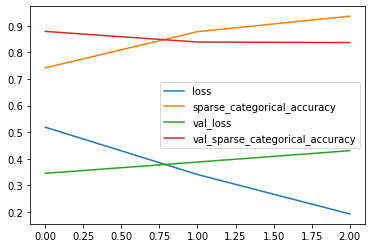

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()

In [ ]:
eval_tf_dataset

<BatchDataset shapes: ({input_ids: (None, 512), token_type_ids: (None, 512), attention_mask: (None, 512)}, (None,)), types: ({input_ids: tf.int64, token_type_ids: tf.int64, attention_mask: tf.int64}, tf.int64)>

## Predict

In [ ]:
outputs = model.predict(eval_tf_dataset)

In [ ]:
outputs

TFSequenceClassifierOutput([('logits', array([[ 1.9909726, -1.8714162],
                                    [ 2.1033654, -1.9309919],
                                    [-1.9539034,  1.7683122],
                                    ...,
                                    [-1.0671086,  1.1468704],
                                    [ 2.278558 , -2.0433629],
                                    [ 1.5467186, -1.5586631]], dtype=float32))])

In [ ]:
probs = tf.nn.softmax(outputs.logits, axis = -1)
probs

<tf.Tensor: shape=(1000, 2), dtype=float32, numpy=
array([[0.9794149 , 0.02058508],
       [0.98261064, 0.01738931],
       [0.02360945, 0.9763906 ],
       ...,
       [0.09850218, 0.90149784],
       [0.9868996 , 0.01310046],
       [0.95711416, 0.04288581]], dtype=float32)>

In [ ]:
preds = tf.argmax(probs, axis = 1)
preds[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0])>

In [ ]:
probs[:10]

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[0.9794149 , 0.02058508],
       [0.98261064, 0.01738931],
       [0.02360945, 0.9763906 ],
       [0.8266094 , 0.17339063],
       [0.37291893, 0.6270811 ],
       [0.93276525, 0.06723472],
       [0.94054466, 0.05945536],
       [0.02659168, 0.97340834],
       [0.02766671, 0.97233325],
       [0.9251412 , 0.07485879]], dtype=float32)>